<a href="https://www.kaggle.com/code/pranayrishith16/insurance-visualization?scriptVersionId=134722619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor



In [91]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking if it has any null or na values

In [92]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Its good news as seems like there aren't any null or na values. And Bad news cause this dataset is well processed.

In [93]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Visualizations

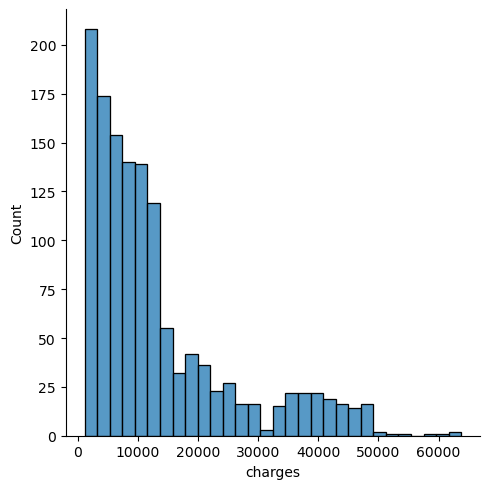

In [96]:
sns.displot(x=df['charges'])

Lots of charges are under 15000.

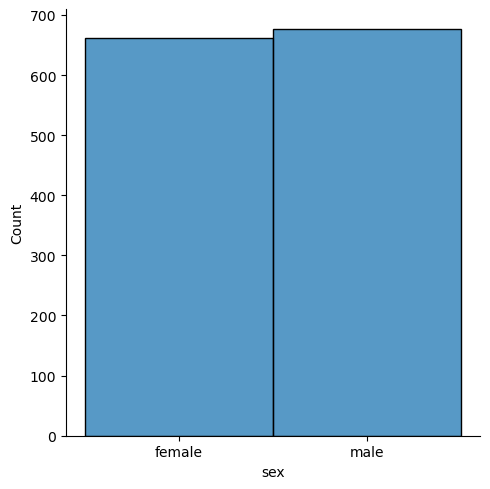

In [97]:
sns.displot(data=df,x='sex')

Well male and female are of similar number.

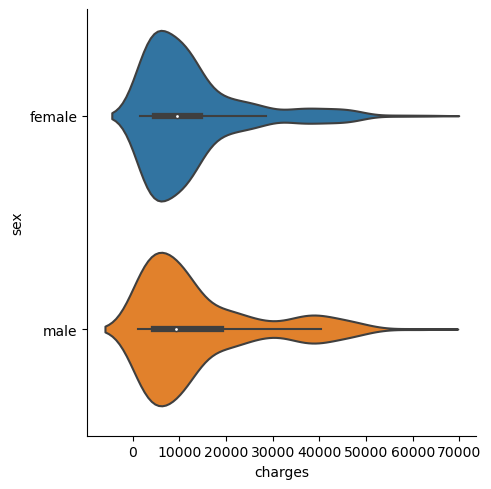

In [98]:
sns.catplot(data=df,x='charges',y='sex',kind='violin')

Male and female have same ranges in charges.

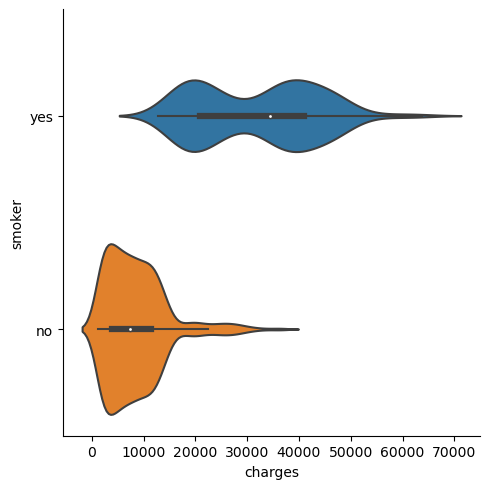

In [99]:
sns.catplot(data=df,x='charges',y='smoker',kind='violin')

Well from this plot, people who dont smoke pay less charges and average is under 10000 and people who smoke pay anything near 20000 or 40000 (there's a dip in between) and lets see how the range looking in next plot.

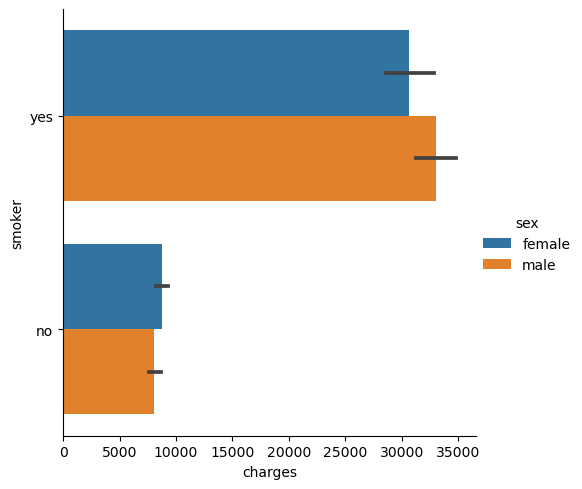

In [100]:
sns.catplot(data=df,x='charges',y='smoker',hue='sex',kind='bar')

Male and women who smoke pay more charges and male pay more charges that women who smoke. Lets find male and female proportions

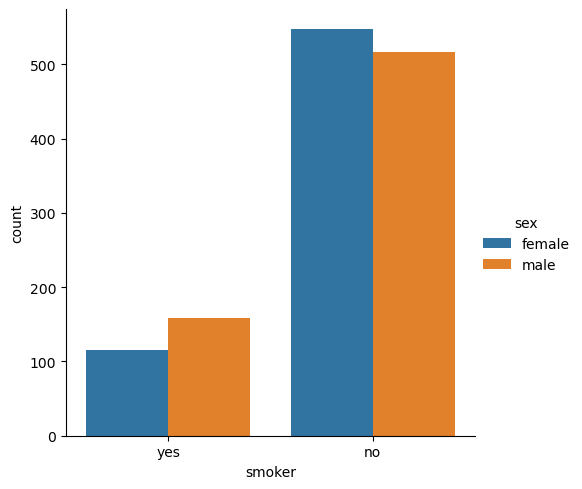

In [101]:
sns.catplot(data=df,x='smoker',kind='count',hue='sex')

Well one thing to note is there are lot of people who dont smoke so that's why the average charges are less for non smokers and massive for smokers. This is just an assumption.

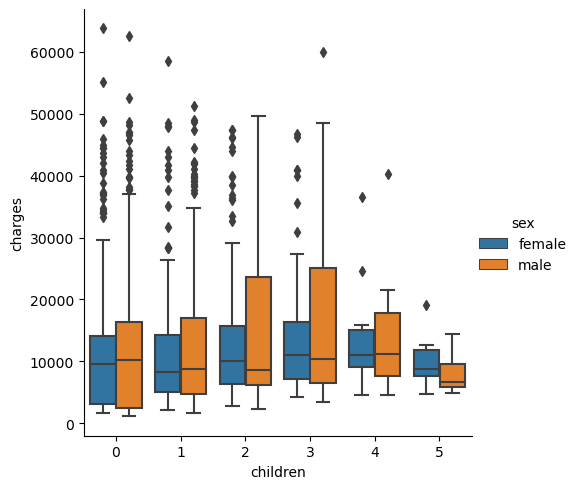

In [102]:
sns.catplot(data=df,x='children',y='charges',hue='sex',kind='box')

Parents with no children and 1 child pay similar charges and parents with 2 and 3 kids have a larger range but average is under 10000.

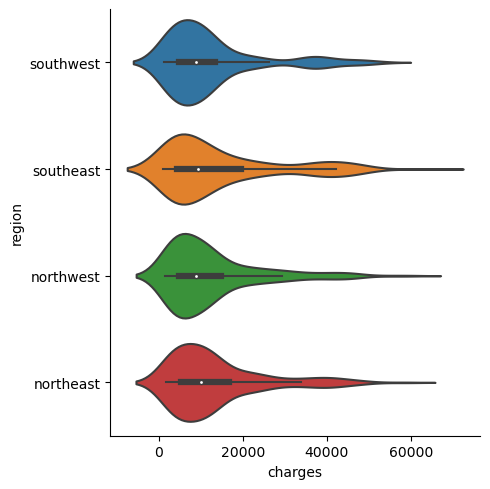

In [103]:
sns.catplot(data=df,x='charges',y='region',kind='violin')

There is not a lot difference in those regions.

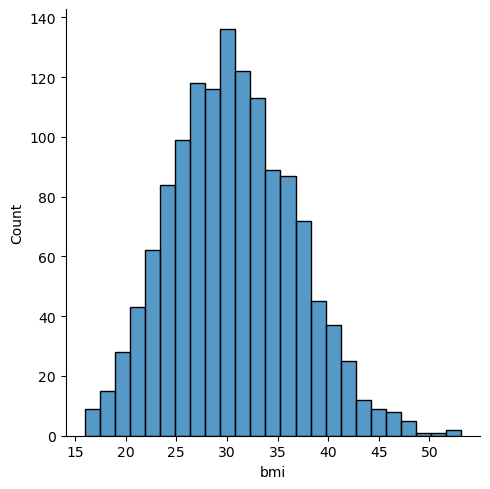

In [104]:
sns.displot(data=df,x='bmi')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

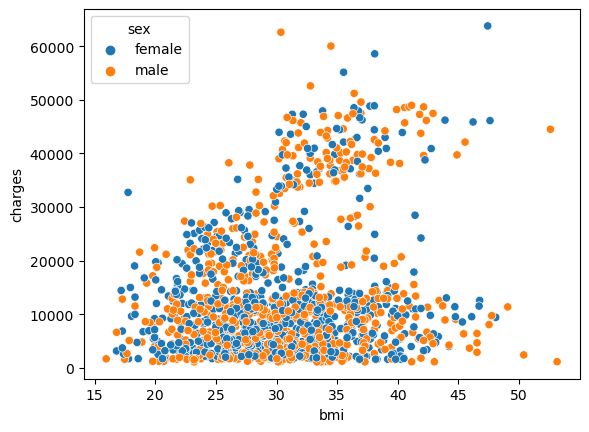

In [105]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='sex')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

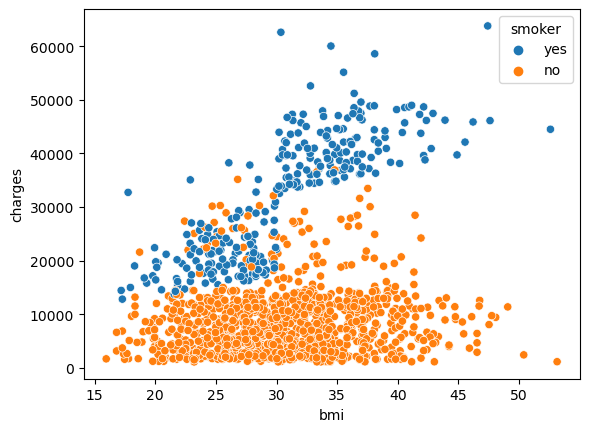

In [106]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

Irrespective of the bmi, smokers pay more charges.

# Preprocessing

We've got 4 categorical variables that require one hot encoding.

In [107]:
cat_cols = ['sex','children','smoker','region']
m_df = pd.get_dummies(data=df,columns=cat_cols,dtype='int8')

In [108]:
m_df.columns

Index(['age', 'bmi', 'charges', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

Well my work right now is to just see the data and understand it.

THANK YOU for reading.